m1 1747.8216896116273
m0 803.943750231188
s2 205318.6135917034
76
9643
257
24
Total Actual Positives: 333
Total Actual Negatives: 9667


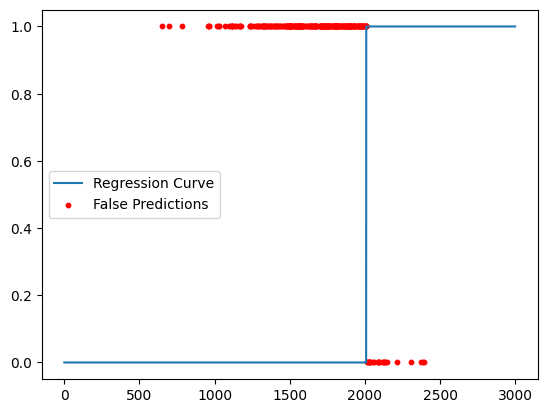

Total Observations is: 10000


In [37]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
#
# seed is 0
#

import numpy as np
import math
import csv
X = np.ones((10000,3))
n =10000
Y = []
i = 0
X1 = []
X0 = []
Xall = []
with open('Default.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    next(reader)
    for row in reader:
        Y.append(1 if row[0] == '"Yes"' else 0)
        X[i][0] = 1 if row[1] == '"Yes"' else 0
        if Y[i] == 1:
            X1.append(float(row[2]))
        else:
            X0.append(float(row[2]))
        Xall.append(float(row[2]))
        X[i][1] = float(row[2])
        X[i][2] = float(row[3])/1000
        
        i+=1
      

    
n1 = Y.count(1)
n0 = Y.count(0)
PY1 = n1/n
PY0 = n0/n
m1 = sum(X1)/n1
m0 = sum(X0)/n0
print("m1",m1)
print("m0",m0)
diff1 = 0
for i in X1:
    diff1+=pow(m1-i,2)
diff0 = 0
for i in X0:
    diff0+=pow(m0-i,2)
s2 = 1/(n-2) * (diff1 + diff0)
print("s2",s2)
def predictY(x):
    method1 = x * m1 / s2 - pow(m1,2) / ( 2 * s2 ) + math.log( PY1 )
    method0 = x * m0 / s2 - pow(m0,2) / ( 2 * s2 ) + math.log( PY0 )
    if method1>method0:
        return 1
    else:
        return 0

truePos, trueNeg, falsePos, falseNeg = 0,0,0,0
wrongX = []
wrongY = []
for loc,x in enumerate(Xall):
    predY = predictY(x)
    if predY == Y[loc]:
        if predY == 1:
            truePos+=1
        else:
            trueNeg+=1
    else:
        if predY == 0:
            falsePos+=1
            wrongY.append(1)
            wrongX.append(Xall[loc])
        else:
            falseNeg+=1    
            wrongY.append(0)
            wrongX.append(Xall[loc])
            
print(truePos)
print(trueNeg)
print(falsePos)
print(falseNeg)
print("Total Actual Positives:", n1)
print("Total Actual Negatives:", n0)

fig, ax = plt.subplots()
x = np.linspace(0, 3000, 10000)
y = [predictY(xT) for xT in x]
plt.plot(x,y, color='C0', label='Regression Curve')
plt.scatter(wrongX , wrongY , color='red', s = 10 , linewidths = 1, marker='o', label="False Predictions")
ax.legend()
ax.axis('auto')
plt.show()
print("Total Observations is:",len(X))
# X = np.asarray(X)
# Y = np.asarray(Y)

# # X = X . reshape( -1 , 1 )
# print( X . shape )
# print( Y . shape )
# clf = LogisticRegression( random_state = 0 ) . fit( X , Y )
# print( clf . score( X , Y ) ) # mean accuracy

# print( clf . intercept_ , clf . coef_ )

In [11]:
# whichever value is higher say yhat(x) = k

# Plot the false positives and false negatives as in 2-Blue-00